# PROGRAM 1	
Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file.


## DATA
sunny,warm,normal,strong,warm,same,yes<br>
sunny,warm,high,strong,warm,same,yes<br> 
rainy,cold,high,strong,warm,change,no<br> 
sunny,warm,high,strong,cool,change,yes<br> 

## CODE

In [1]:
import csv
hypothesis = ['?','?','?','?','?','?']
csv_contents = csv.reader(open('d.csv'),delimiter = ',')
data =[row for row in csv_contents if(row[len(row)-1].upper() == "YES")]

print('Positive examples are: ')
for row in data:
	print(row)

print("\nFind-S Steps:")
print(hypothesis)

totalExamples = len(data)
attrituteCount = len(data[0])-1
hypothesis = data[0]
for i in range(totalExamples):
	for j in range(attrituteCount):
		if(hypothesis[j] != data[i][j]):
			hypothesis[j]='?'
	print(hypothesis)
print('\nMost specific hypothesis is:',hypothesis)

Positive examples are: 
['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']

Find-S Steps:
['?', '?', '?', '?', '?', '?']
['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm', '?', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm', '?', 'strong', '?', '?', 'yes']

Most specific hypothesis is: ['sunny', 'warm', '?', 'strong', '?', '?', 'yes']


------
# PROGRAM 2
For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.

## CODE

In [2]:
import csv
def predict(data, model):
	flag = True
	for i,ele in enumerate(model):
		if ele!='?' and ele!=data[i]:
			flag = False
			break
	return flag

def train():
	s=["","","","","",""]
	g=[["?","?","?","?","?","?"]]
	print("S0: >>",s)
	print("G0: >>",g)
	data = csv.reader(open('d.csv'),delimiter=',')
	for i,row in enumerate(data):
		attributeCount = len(row)-1
		if row[attributeCount] == "yes":
			for j,col in enumerate(row[:attributeCount]):
				if s[j] == "":
					s[j] = col
				elif s[j] != col:
					s[j]="?"
			n = len(g)
			m=0
			while m<n:
				if predict(row[:attributeCount],g[m]) == False:
					g = g[:m]+g[m+1:]
					n=n-1
				m=m+1
		else:
			for m in range(len(g)):
				if predict(row[:attributeCount],g[m]) == True:
					toSpecific = g[m]
					g = g[:m]+g[m+1:]
				for j,col in enumerate(toSpecific):
					if s[j]!="?" and s[j]!=col and s[j]!=row[j]:
						temp = toSpecific[:]
						temp[j] = s[j]
						g += [temp]
		print("S",(i+1),": >>",s)
		print("G",(i+1),": >>",g)
# 	return s,g
train()

S0: >> ['', '', '', '', '', '']
G0: >> [['?', '?', '?', '?', '?', '?']]
S 1 : >> ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
G 1 : >> [['?', '?', '?', '?', '?', '?']]
S 2 : >> ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G 2 : >> [['?', '?', '?', '?', '?', '?']]
S 3 : >> ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G 3 : >> [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
S 4 : >> ['sunny', 'warm', '?', 'strong', '?', '?']
G 4 : >> [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


------
# PROGRAM 3
Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge toclassify a new sample.

In [3]:
import numpy
import pandas as pd
import math
class Node:
	def __init__(self,l):
		self.label = l
		self.branches = {}
def entropy(data):
	total_ex = len(data)
	positive_ex = len(data.ix[data["PlayTennis"] == 'Yes'])
	negative_ex = len(data.ix[data["PlayTennis"] == 'No'])
	entropy = 0
	if positive_ex > 0:
		entropy = (-1 * (positive_ex / float(total_ex))*(math.log(positive_ex,2) - math.log(total_ex,2)))
	if negative_ex > 0:
		entropy += (-1 * (negative_ex / float(total_ex))*(math.log(negative_ex,2) - math.log(total_ex,2)))
	return entropy
def gain(s,data,attrib):
	gain = s
	values = set(data[attrib])
	for val in values:
		gain -= len(data.ix[data[attrib]== val])/ float(len(data)) * entropy(data.ix[data[attrib]==val])
	return gain
def get_attrib(data):
	entropy_s = entropy(data)
	attribute = ""
	max_gain = 0
	for attr in data.columns[:len(data.columns)-1]:
		g = gain(entropy_s,data,attr)
		if g > max_gain :
			max_gain = g
			attribute = attr
	return attribute
def decisionTree(data):
	root = Node("NULL")
	if(entropy(data)==0):
		if(len(data.ix[data["PlayTennis"]=="Yes"]) == len(data)):
			root.label = "Yes"
			return root
		else:
			root.label = "No"
			return root
	if len(data.columns) == 1:
		return
	else:
		attrib = get_attrib(data)
		root.label = attrib
		values = set(data[attrib])
		for val in values:
			root.branches[val] = decisionTree(data.ix[data[attrib]==val].drop(attrib,axis=1))
		return root
def get_rules(root,rule,rules):
	if not root.branches:
		rules.append(rule[:-2]+"=>"+root.label)
		return rules
	for i in root.branches:
		get_rules(root.branches[i],rule+root.label+"="+i+" ^ ",rules)
	return rules
def test(tree,test_str):
	if not tree.branches:
		return tree.label
	return test(tree.branches[test_str[tree.label]],test_str)

data = pd.read_csv('data.csv')
entropy_s = entropy(data)
cols = len(data.columns)-1
tree = decisionTree(data)
rules = get_rules(tree," ",[])
print(rules)
test_str = {}
print("Enter the test case input:")
for i in data.columns[:-1]:
	test_str[i] = input(i+":")
print(test_str)
print(test(tree,test_str))

c:\users\harsha sridhar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


[' Outlook=Overcast =>Yes', ' Outlook=Rainy ^ Wind=Strong =>No', ' Outlook=Rainy ^ Wind=Weak =>Yes', ' Outlook=Sunny ^ Humidity=High =>No', ' Outlook=Sunny ^ Humidity=Normal =>Yes']
Enter the test case input:
Outlook:Rainy
Temperature:Hot
Humidity:High
Wind:Weak
{'Outlook': 'Rainy', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak'}
Yes


------
# PROGRAM 4
Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [4]:
from random import random
from random import seed
from random import randrange
from math import exp
from csv import reader
def load_csv(filename):
	csv_contents = reader(open(filename),delimiter = ',')
	data = [row for row in csv_contents]
	return data
def str_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
def str_to_int(dataset, column):
	unique = set([row[column] for row in dataset])
	lookup = dict()
	for i,value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column),max(column)] for column in zip(*dataset)]
	return stats
def normalize_dataset(dataset,minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1]-minmax[i][0])
def accuracy_metric(actual, predicted):
	print(actual)
	print(predicted)
	return ([actual[i]-predicted[i] for i in range(len(actual))].count(0))/float(len(actual))*100.0
# def evaluate_algorithm()
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i]*inputs[i]
	return activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
def transfer_derivative(output):
	return output * (1.0 - output)
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i+1]:
					error += (neuron['weights'][j]*neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j]*transfer_derivative(neuron['output'])
def update_weights(network,row,l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i-1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate*neuron['delta']*inputs[j]
			neuron['weights'][-1] += l_rate*neuron['delta']
def train_network(network,train,test,l_rate,n_epoch,n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs=forward_propagate(network,row)
			expected=[0 for i in range(n_outputs)]
			expected[row[-1]]=1
			backward_propagate_error(network,expected)
			update_weights(network,row,l_rate)
def initialize_network(n_inputs,n_hidden,n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs+1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden+1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
def predict(network, row):
	outputs = forward_propagate(network,row)
	return outputs.index(max(outputs))
def backpropagation(train,test,l_rate,n_epoch,n_hidden):
	n_inputs = len(train[0])-1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs,n_hidden,n_outputs)
	train_network(network,train,test,l_rate,n_epoch,n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network,row[:-1])
		predictions.append(prediction)
	return predictions
seed(1)
dataset = load_csv('seeds_dataset.csv')
for i in range(len(dataset[0])-1):
	str_to_float(dataset,i)
str_to_int(dataset,len(dataset[0])-1)
minmax = dataset_minmax(dataset)
normalize_dataset(dataset,minmax)
l_rate = 0.5
n_epoch = 20
n_hidden = 5
train = dataset[:180]
test = dataset[180:]
actual = [row[-1] for row in test]
predicted = backpropagation(train,test,l_rate,n_epoch,n_hidden)
accuracy = accuracy_metric(actual,predicted)
print("Accuracy: ",accuracy)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy:  100.0


------
# PROGRAM 5
Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

In [5]:
from random import randrange
from csv import reader
import pandas as pd
import numpy as np
import math
def safe_div(x,y):
	if y == 0:
		return 0
	return x/y
def load_csv(filename):
	csv_contents = reader(open(filename),delimiter = ',')
	data = [row for row in csv_contents]
	for i in range(len(data)):
		data[i] = [float(j) for j in data[i]]
	return data
def splitData(data,splitRatio):
	trainSize = int(len(data) * splitRatio)
	train = []
	test = list(data)
	while trainSize :
		index = randrange(len(test))
		train.append(test.pop(index))
		trainSize -=1
	return train,test
def separateByClass(data):
	separated = {}
	for i in range(len(data)):
		vector = data[i]
		if vector[-1] not in separated:
			separated[vector[-1]]=[]
		separated[vector[-1]].append(vector)
	return separated
def mean(numbers):
	return sum(numbers) / float(len(numbers))
def stdev(numbers):
	avg = mean(numbers)
	variance = safe_div(sum([pow(x-avg,2) for x in numbers]),float(len(numbers)-1))
	return math.sqrt(variance)
def summarize(data):
	summaries = [(mean(attribute),stdev(attribute)) for attribute in zip(*data)]
	del summaries[-1]
	return summaries
def summarizeByClass(data):
	separated = separateByClass(data)
	summaries = {}
	for classValue in separated.keys():
		instances = separated[classValue]
		summaries[classValue] = summarize(instances)
	return summaries
def calculateProbablity(x,mean,stdev):
	if stdev == 0:
		exponent = 0
		return exponent
	else:
		exponent = math.exp(-math.pow(x-mean,2)/(2*math.pow(stdev,2)))
		return 1 / (math.sqrt(2*math.pi)*stdev)*exponent
def calculateClassProbablities(summaries,inputVector):
	probablities = {}
	for classValue in summaries.keys():
		classSummaries = summaries[classValue]
		probablities[classValue] = 1
		for i in range(len(classSummaries)):
			mean,stdev = classSummaries[i]
			x = inputVector[i]
			probablities[classValue] *= calculateProbablity(x,mean,stdev)
	return probablities
def predict(summaries,inputVector):
	probablities = calculateClassProbablities(summaries,inputVector)
	bestLabel,bestProb = None,-1
	for classValue in probablities.keys():
		probablity = probablities[classValue]
		if probablity > bestProb :
			bestProb = probablity
			bestLabel = classValue
	return bestLabel
def getPredicitions(summaries,testSet):
	predictions = [] 
	for i in range(len(testSet)):
		result = predict(summaries,testSet[i])
		predictions.append(result)
	return predictions

data = load_csv('cancer.csv')
splitRatio = 0.85
train,test = splitData(data,splitRatio)
summaries = summarizeByClass(train)
predictions = getPredicitions(summaries,test)
accuracy = list(test[i][-1]-predictions[i] for i in range(len(test))).count(0) / float(len(test)) * 100.0
print("Accuracy : ",round(accuracy,2),"%")


Accuracy :  96.0 %


------
# PROGRAM 6
Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform this task. Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and recall for your data set.

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
cat = ['alt.atheism','soc.religion.christian','comp.graphics','sci.med']
train = fetch_20newsgroups(subset = 'train',categories = cat,shuffle = True)
test = fetch_20newsgroups(subset = 'test',categories = cat,shuffle = True)
count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train_tf = count_vectorizer.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
model = MultinomialNB()
model.fit(X_train_tfidf,train.target)
X_test_tf = count_vectorizer.transform(test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_tf)
predicted = model.predict(X_test_tfidf)

print("Accuracy: ",round(accuracy_score(test.target,predicted),2)*100.0,"%")
print("Classification Report:\n",classification_report(test.target,predicted,target_names=test.target_names))
print("Confusion Matrix:\n",confusion_matrix(test.target,predicted))

Accuracy:  83.0 %
Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

           avg / total       0.88      0.83      0.84      1502

Confusion Matrix:
 [[192   2   6 119]
 [  2 347   4  36]
 [  2  11 322  61]
 [  2   2   1 393]]


-----
# PROGRAM 7
Write a program to construct aBayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. You can use Java/Python ML library classes/API.

In [7]:
import pandas as pd
import numpy as np
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

data = pd.read_csv('heart_disease_data.csv')
data = data.replace('?',np.nan)
print('\nFirst few values from dataset:')
print(data.head())
print('\nAttribute and Datatypes:')
print(data.dtypes)
model = BayesianModel([('age','fbs'),('age','trestbps'),('fbs','heartdisease'),('trestbps','heartdisease'),
						('sex','trestbps'),('exang','trestbps'),('heartdisease','restecg'),
						('heartdisease','thalach'),('heartdisease','chol')])
model.fit(data,estimator = MaximumLikelihoodEstimator)
data_inference = VariableElimination(model)
print('Probablity of heart disease given a particular age:')
q = data_inference.query(variables=['heartdisease'],evidence={'age':int(input('Enter the age: '))})
print(q['heartdisease'])
print('Probablity of heart disease given cholesterol:')
q=data_inference.query(variables=['heartdisease'],evidence={'chol':int(input('Enter cholesterol level: '))})
print(q['heartdisease'])


First few values from dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  heartdisease  
0    3.0  0.0  6.0             0  
1    2.0  3.0  3.0             2  
2    2.0  2.0  7.0             1  
3    3.0  0.0  3.0             0  
4    1.0  0.0  3.0             0  

Attribute and Datatypes:
age             float64
sex             float64
cp              float64
trestbps        float64
chol            float64
fbs             float64
restecg         float64
thalach         float64
exang           float64
oldpeak         float64
slope           float64
ca   

------
# PROGRAM 8
Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML
library classes/API in the program.

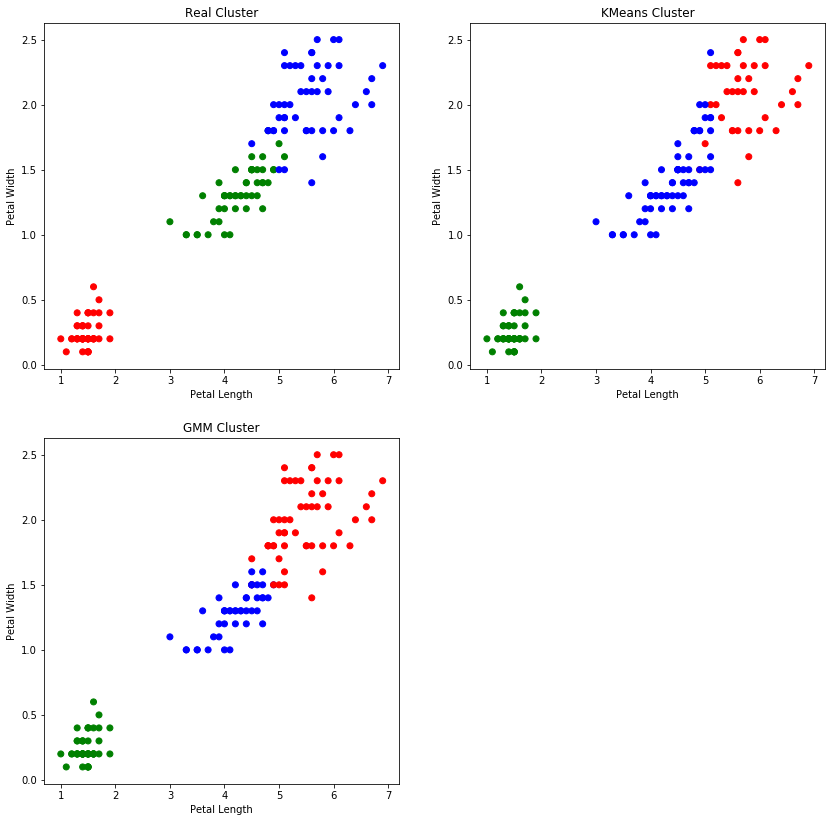

In [8]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Speal_Width','Petal_Length','Petal_Width']
Y = pd.DataFrame(iris.target)
Y.columns = ['target']

model = KMeans(n_clusters=3)
model.fit(X)

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gmm_y = gmm.predict(X)

plt.figure(figsize=(14,14))
colormap = np.array(['red','green','blue'])
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.target])
plt.title("Real Cluster")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])
plt.title("KMeans Cluster")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[gmm_y])
plt.title("GMM Cluster")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

------
# PROGRAM 9
Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

In [9]:
from sklearn import utils
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
categories = iris.target_names
X,Y = utils.shuffle(iris.data,iris.target)
X_train = X[:100]
X_test = X[100:]
Y_train = Y[:100]
Y_test = Y[100:]
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)
predicted = knn.predict(X_test)
accuracy = list(predicted-Y_test).count(0) / len(Y_test) *100.0
wrong_predictions = []
print('Correct Predictions:')
for i in range(len(Y_test)):
	if Y_test[i] == predicted[i]:
		print("Actual Class:",categories[Y_test[i]],"\tPredicted Class:",categories[predicted[i]])
	else:
		wrong_predictions.append("Actual Class:"+categories[Y_test[i]]+"  Predicted Class:"+categories[predicted[i]])
print('Wrong Predictions:')
print(wrong_predictions)
print("Accuracy:",accuracy,"%")

Correct Predictions:
Actual Class: setosa 	Predicted Class: setosa
Actual Class: setosa 	Predicted Class: setosa
Actual Class: setosa 	Predicted Class: setosa
Actual Class: setosa 	Predicted Class: setosa
Actual Class: setosa 	Predicted Class: setosa
Actual Class: virginica 	Predicted Class: virginica
Actual Class: versicolor 	Predicted Class: versicolor
Actual Class: versicolor 	Predicted Class: versicolor
Actual Class: setosa 	Predicted Class: setosa
Actual Class: virginica 	Predicted Class: virginica
Actual Class: setosa 	Predicted Class: setosa
Actual Class: setosa 	Predicted Class: setosa
Actual Class: setosa 	Predicted Class: setosa
Actual Class: setosa 	Predicted Class: setosa
Actual Class: versicolor 	Predicted Class: versicolor
Actual Class: virginica 	Predicted Class: virginica
Actual Class: virginica 	Predicted Class: virginica
Actual Class: virginica 	Predicted Class: virginica
Actual Class: setosa 	Predicted Class: setosa
Actual Class: versicolor 	Predicted Class: versicol

------
# PROGRAM 10
Implement the non-parametric Locally Weighted Regressionalgorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

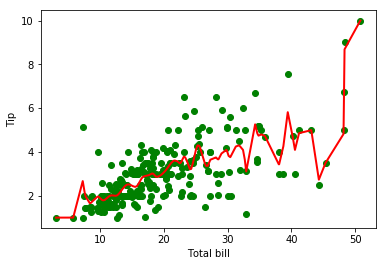

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 
import pandas as pd 
def kernel(point,xmat,k):
	m,n = np.shape(xmat)
	weights = np.mat(np.eye((m)))
	for j in range(m):
		diff = point - X[j]
		weights[j,j] = np.exp((diff*diff.T)/(-2.0*k**2))
	return weights
def localWeight(point,xmat,ymat,k):
	w = kernel(point,xmat,k)
	W = (X.T*(w*X)).I *(X.T*(w*ymat.T))
	return W
def localWeightRegression(xmat, ymat, k):
	m,n = np.shape(xmat)
	ypred = np.zeros(m)
	for i in range(m):
		ypred[i] = xmat[i] * localWeight(xmat[i],xmat,ymat,k)
	return ypred
def graphPlot(X,Y):
	sortIndex =X[:,1].argsort(0)
	xsort = X[sortIndex][:,0]
	fig = plt.figure()
	ax = fig.add_subplot(1,1,1)
	ax.scatter(bill,tip,color='green')
	ax.plot(xsort[:,1],Y[sortIndex],color='red',linewidth=2)
	plt.xlabel('Total bill')
	plt.ylabel('Tip')
	plt.show()

data = pd.read_csv('bill_data.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
ones = np.mat(np.ones(np.shape(mbill)[1]))
X = np.hstack((ones.T,mbill.T))
ypred = localWeightRegression(X,mtip,0.5)
graphPlot(X,ypred)